In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
matches = pd.read_csv('/content/matches .csv')
deliveries = pd.read_csv('/content/deliveries .csv')

matches.head()
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [3]:
matches.shape
matches.info()
matches.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

,0
id,0
season,0
city,7
date,0
team1,0
team2,0
toss_winner,0
toss_decision,0
result,0
dl_applied,0


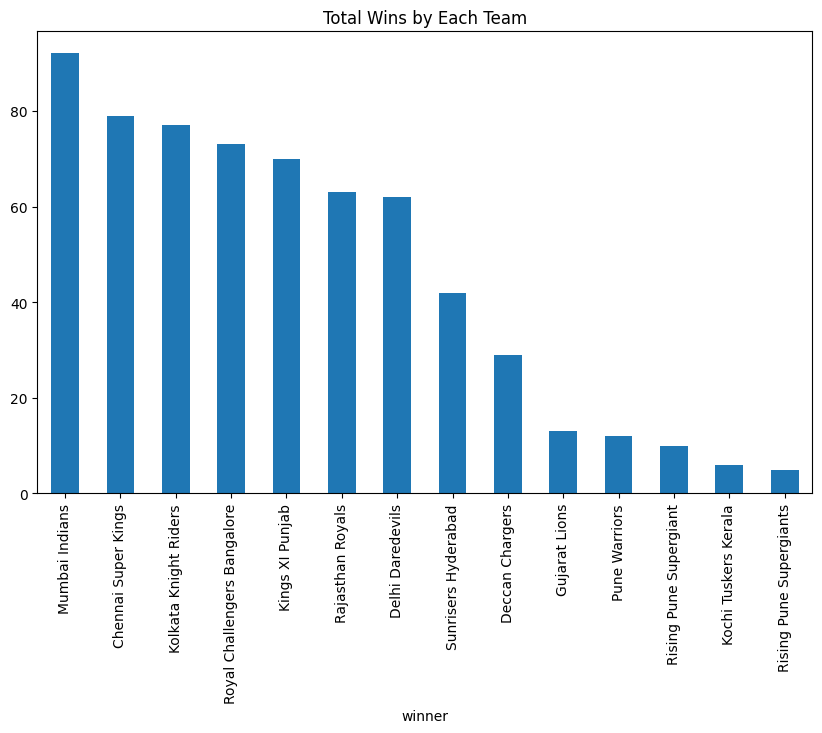

In [4]:
wins = matches['winner'].value_counts()

plt.figure(figsize=(10,6))
wins.plot(kind='bar')
plt.title("Total Wins by Each Team")
plt.show()

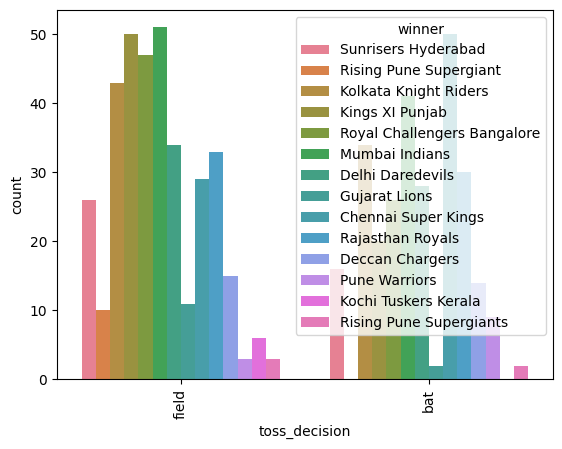

In [7]:
sns.countplot(x='toss_decision', hue='winner', data=matches)
plt.xticks(rotation=90)
plt.show()

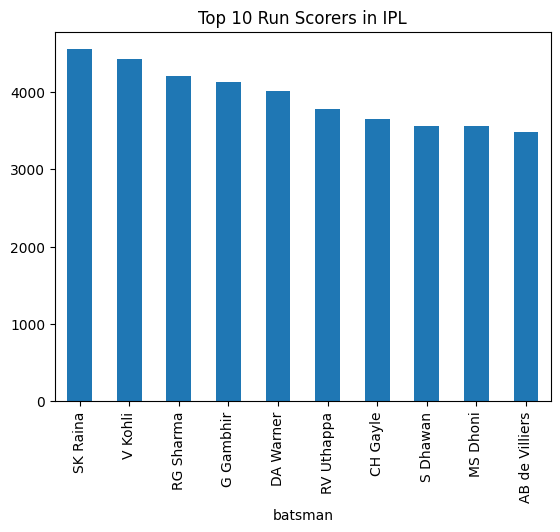

In [9]:
top_runs = deliveries.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(10)

top_runs.plot(kind='bar')
plt.title("Top 10 Run Scorers in IPL")
plt.show()

In [11]:
# Merge deliveries with matches to get the 'season' column
merged_data = pd.merge(deliveries, matches[['id', 'season']], left_on='match_id', right_on='id')

# Group by season and batsman to sum runs
season_runs = merged_data.groupby(['season', 'batsman'])['batsman_runs'].sum().reset_index()

# Get the top run scorer for each season
season_runs.sort_values(['season', 'batsman_runs'], ascending=[True, False]).groupby('season').head(1)

,season,batsman,batsman_runs
115,2008,SE Marsh,616
229,2009,ML Hayden,572
446,2010,SR Tendulkar,618
502,2011,CH Gayle,608
684,2012,CH Gayle,733
910,2013,MEK Hussey,733
1088,2014,RV Uthappa,660
1148,2015,DA Warner,562
1383,2016,V Kohli,973
1422,2017,DA Warner,641


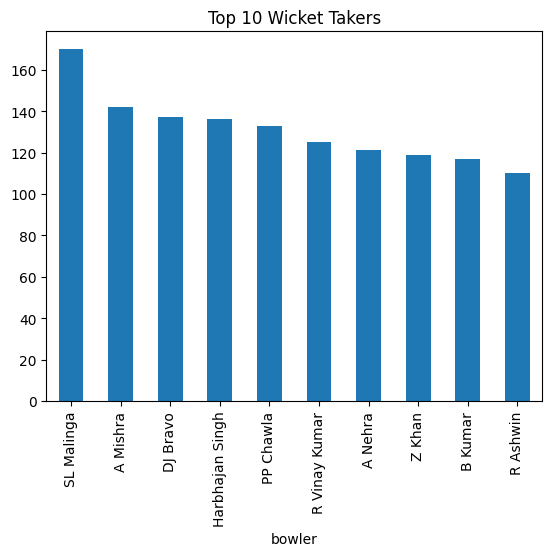

In [12]:
wickets = deliveries[deliveries['dismissal_kind'].notnull()]
top_wickets = wickets['bowler'].value_counts().head(10)

top_wickets.plot(kind='bar')
plt.title("Top 10 Wicket Takers")
plt.show()

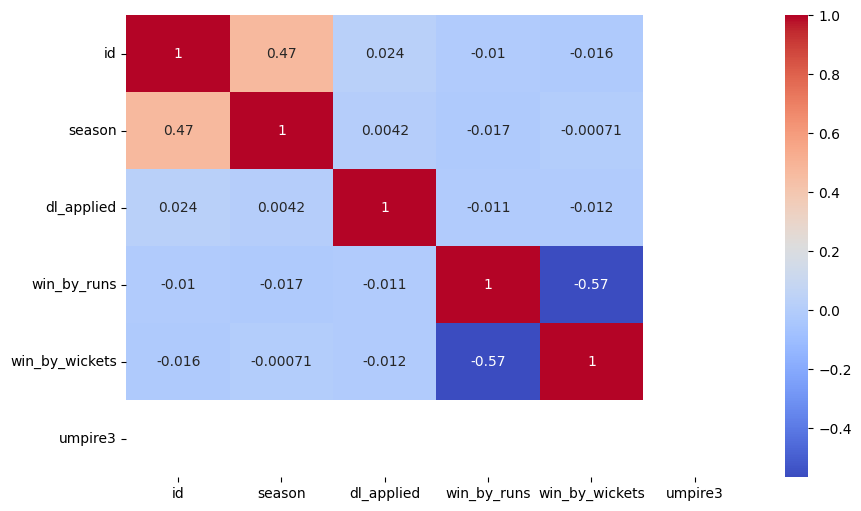

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(matches.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()